# Testing the LangGraph Implementation

## Importing Libraries

In [1]:
from langgraph_flow import *
from read_email import *

In [2]:
from dotenv import load_dotenv

load_dotenv(dotenv_path=f"{path}/config/config.env")
EMAIL = os.getenv("EMAIL_ID")

## Defining static emails

In [3]:
email1 = """Hello Saideep,




Thank you for applying to Samsung SDS America!!! We're excited you'd consider
joining us, and wanted to confirm we have received your application for our
open Logistics Data Analyst (EM6934) position. 

Although this is an automated message, our team is working hard to review
applications. We will be in touch if your experience is a good match for the
position.

Please know it may take sometime for us to get back to you.

In the meantime, we are glad to share with you a couple of resources to get to
know us a bit more.

Here are a few places you can learn more about Samsung SDS America:

Our Awards &amp; Recognition
Our Offerings
Our Events

Sometimes these emails can be filtered as spam. Please consider adding our
domain as a safe sender, or setting up a "not spam" filter rule to be sure our
emails come through.




Thanks again for your interest in Samsung SDS America!




Best regards,

Talent Acquisition Team

Samsung SDS America, Inc."""


email2 = """Have you had time to improve your resume?


[TopResume®]


You're up against 250 other candidates


Hi Saideep,


I noticed you’ve checked your resume review.


Even the most experienced professionals find it hard to craft the perfect resume. I bet you’ve achieved more in your career than you remember. It’s always a challenge to share your strengths and successes in a clear, concise way.

At the same time, the competition is always strong. When you apply for a job, you’re probably competing with 250 other candidates.

A certified resume writer will improve your chances.

---

Find Your Writer
<https://topresume.com/resume-writing?utm_content=cta_find_your_writer> 

---


Let me know if you have any questions.


Best wishes,


Sebastian King
TopResume Resume Expert
contact@topresume.com | 1-800-604-1929



[TopResume®]

©2025 TopResume
<https://topresume.com>


420 Lexington Ave | Suite 1402-1063 | New York, NY 10170


Privacy <https://topresume.com/privacy>

Terms of Use <https://topresume.com/terms>

Unsubscribe <https://topresume.com/unsubscribe>"""

email3 = """Hey Saideep,
Can we connect over a teams call tomorrow?
Regards, John Doe"""


email4 = """Interview Invitation – Data Scientist Role

Hi Priya,

We’re pleased to inform you that you have successfully cleared the assessment for the Data Scientist position at Quantum Analytics. Our team was impressed with your performance and would like to proceed with the next stage of the hiring process.

We would like to schedule your interview on either Tuesday, August 12th or Thursday, August 14th, between 10:00 AM and 2:00 PM. Please let us know your preferred date and time, and we will confirm the slot accordingly.

The interview will be conducted virtually via Microsoft Teams, and further details will be shared once your schedule is confirmed.

Looking forward to your response.

Best regards,
Ananya Kapoor
Recruitment Coordinator
Quantum Analytics Pvt. Ltd.
ananya.kapoor@quantumanalytics.com
+1 (628) 555-4173"""


## Creating and displaying graph

In [4]:
graph = build_graph()

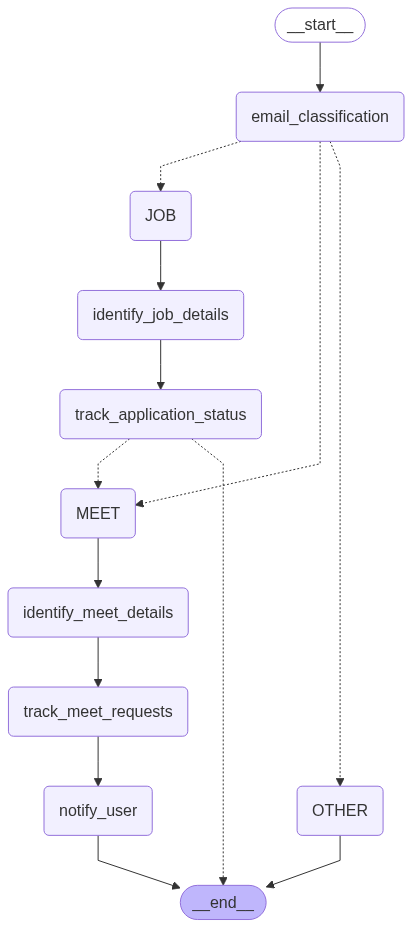

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    print("gone")
    pass

## Invoking graph with emails

In [6]:
graph.invoke({"email": email1, "email_sent_on": "2025-07-13", "sender_email": "johndoe@gmail.com"})

---CLASSIFYING EMAIL---
['True', 'False', 'False']
Routing to: JOB
---IN JOB STATUS PATH---
This function reads the email to extract job title, company name and job status
This function updated the tracker with extracted job details
Ending flow after job status update


{'state': 'Tracker update successful',
 'email': 'Hello Saideep,\n\n\n\n\nThank you for applying to Samsung SDS America!!! We\'re excited you\'d consider\njoining us, and wanted to confirm we have received your application for our\nopen Logistics Data Analyst (EM6934) position. \n\nAlthough this is an automated message, our team is working hard to review\napplications. We will be in touch if your experience is a good match for the\nposition.\n\nPlease know it may take sometime for us to get back to you.\n\nIn the meantime, we are glad to share with you a couple of resources to get to\nknow us a bit more.\n\nHere are a few places you can learn more about Samsung SDS America:\n\nOur Awards &amp; Recognition\nOur Offerings\nOur Events\n\nSometimes these emails can be filtered as spam. Please consider adding our\ndomain as a safe sender, or setting up a "not spam" filter rule to be sure our\nemails come through.\n\n\n\n\nThanks again for your interest in Samsung SDS America!\n\n\n\n\nBest 

In [7]:
graph.invoke({"email": email2, "email_sent_on": "2025-07-13", "sender_email": "johndoe@gmail.com"})

---CLASSIFYING EMAIL---
['False', 'False', 'True']
Routing to: OTHER
---IN OTHER PATH---


{'state': 'Other flow triggered',
 'email': "Have you had time to improve your resume?\n\n\n[TopResume®]\n\n\nYou're up against 250 other candidates\n\n\nHi Saideep,\n\n\nI noticed you’ve checked your resume review.\n\n\nEven the most experienced professionals find it hard to craft the perfect resume. I bet you’ve achieved more in your career than you remember. It’s always a challenge to share your strengths and successes in a clear, concise way.\n\nAt the same time, the competition is always strong. When you apply for a job, you’re probably competing with 250 other candidates.\n\nA certified resume writer will improve your chances.\n\n---\n\nFind Your Writer\n<https://topresume.com/resume-writing?utm_content=cta_find_your_writer> \n\n---\n\n\nLet me know if you have any questions.\n\n\nBest wishes,\n\n\nSebastian King\nTopResume Resume Expert\ncontact@topresume.com | 1-800-604-1929\n\n\n\n[TopResume®]\n\n©2025 TopResume\n<https://topresume.com>\n\n\n420 Lexington Ave | Suite 1402-1063

In [8]:
graph.invoke({"email": email3, "email_sent_on": "2025-07-13", "sender_email": "johndoe@gmail.com"})

---CLASSIFYING EMAIL---
['False', 'True', 'False']
Routing to: MEET
---IN ONLINE MEET PATH---
This function reads the email to extract online meet requested date, time, duration
This function is to record the meet details in the tracker
This function is to notify the user that this email requires immediate attention
✅ Email sent! Message ID: 198c52d606cdf57d


{'state': 'User notified about the meeting request email',
 'email': 'Hey Saideep,\nCan we connect over a teams call tomorrow?\nRegards, John Doe',
 'email_sent_on': '2025-07-13',
 'sender_email': 'johndoe@gmail.com',
 'classification': 'MEET',
 'meet_request_details': {'sender_email': 'johndoe@gmail.com',
  'request_sent_by': 'John Doe',
  'mail_sent_date': '2025-07-13',
  'requested_date_time': '',
  'reason_for_meeting': 'connect over a teams call'},
 'is_both_job_and_meet': False}

In [9]:
graph.invoke({"email": email4, "email_sent_on": "2025-07-13", "sender_email": "johndoe@gmail.com"})

---CLASSIFYING EMAIL---
['True', 'True', 'False']
Routing to: JOB
---IN JOB STATUS PATH---
This function reads the email to extract job title, company name and job status
This function updated the tracker with extracted job details
Routing to: MEET path from JOB flow
---IN ONLINE MEET PATH---
This function reads the email to extract online meet requested date, time, duration
This function is to record the meet details in the tracker
This function is to notify the user that this email requires immediate attention
✅ Email sent! Message ID: 198c52d7a5fffaa1


{'state': 'User notified about the meeting request email',
 'email': 'Interview Invitation – Data Scientist Role\n\nHi Priya,\n\nWe’re pleased to inform you that you have successfully cleared the assessment for the Data Scientist position at Quantum Analytics. Our team was impressed with your performance and would like to proceed with the next stage of the hiring process.\n\nWe would like to schedule your interview on either Tuesday, August 12th or Thursday, August 14th, between 10:00 AM and 2:00 PM. Please let us know your preferred date and time, and we will confirm the slot accordingly.\n\nThe interview will be conducted virtually via Microsoft Teams, and further details will be shared once your schedule is confirmed.\n\nLooking forward to your response.\n\nBest regards,\nAnanya Kapoor\nRecruitment Coordinator\nQuantum Analytics Pvt. Ltd.\nananya.kapoor@quantumanalytics.com\n+1 (628) 555-4173',
 'email_sent_on': '2025-07-13',
 'sender_email': 'johndoe@gmail.com',
 'classification': 

## Reading from inbox and invoking graph

In [10]:
result = read_emails(max_results=5)
print(len(result))

5


In [11]:
for mail_details in result:
    if(mail_details["sender"] == EMAIL):
        # Indicates that the email is from me, no need to process it
        continue
    else:
        email = f"sender email: {mail_details['sender']}" + '\n' + mail_details['subject'] + '\n'+ mail_details['body']  
        print(graph.invoke({"email":email, "email_sent_on": mail_details['date'], "sender_email": mail_details['sender']}))

    print()
    print("="*100)
    print()

---CLASSIFYING EMAIL---
['False', 'False', 'True']
Routing to: OTHER
---IN OTHER PATH---
{'state': 'Other flow triggered', 'email': "sender email: Ford Careers <RecruitingNoReply@ford.com>\nNew job opportunities at Ford Global Career Site\nHello Saideep, You might be a great fit for the new positions we just posted! We hope you're still interested in finding your dream job at Ford Motor Company. If so, we invite you to see if this might be the one. Learn more here: Staff Embedded Software Engineer, Drive Inverter See all opportunities Sincerely, Ford Talent Acquisition Team If you do not want to receive these job notifications, or if you want to update your preferences, go to our career site.", 'email_sent_on': 'Wed, 20 Aug 2025 01:42:56 +0000 (UTC)', 'sender_email': 'Ford Careers <RecruitingNoReply@ford.com>', 'classification': 'OTHER', 'is_both_job_and_meet': False}




In [10]:
import base64
import re
import os
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.discovery import build

# --- Configuration ---
# If token.json does not exist, you will be prompted to log in.
SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']
TOKEN_PATH = 'token.json'
CREDS_PATH = 'credentials.json' # Download this from your Google Cloud project

# --- Helper Functions ---

def extract_header(headers, name):
    """Extract a specific header value from a list of email headers."""
    header = next((h['value'] for h in headers if h['name'].lower() == name.lower()), None)
    return header

def get_email_body(payload):
    """Decode and return the plain text body of an email."""
    if 'parts' in payload:
        for part in payload['parts']:
            if part.get('mimeType') == 'text/plain' and 'data' in part.get('body', {}):
                body_data = part['body']['data']
                return base64.urlsafe_b64decode(body_data).decode('utf-8', errors='ignore')
    elif 'data' in payload.get('body', {}):
        body_data = payload['body']['data']
        return base64.urlsafe_b64decode(body_data).decode('utf-8', errors='ignore')
    return ""

def _clean_email_body(body):
    """Removes quoted text and signatures from an email body."""
    # Pattern to find lines like "On Wed, Aug 27, 2025 at 2:59 AM..."
    reply_header_pattern = re.compile(r"On\s(Mon|Tue|Wed|Thu|Fri|Sat|Sun),\s\w+\s\d{1,2},\s\d{4}.*wrote:", re.DOTALL)
    body = reply_header_pattern.split(body)[0]

    # Remove lines starting with '>'
    lines = body.split('\n')
    cleaned_lines = [line for line in lines if not line.strip().startswith('>')]
    body = "\n".join(cleaned_lines)

    # Remove common signature indicators
    signature_pattern = re.compile(r"(--|--\s|--\s\w|Regards,|Best,|Thanks,).*", re.DOTALL)
    body = signature_pattern.split(body)[0]

    return body.strip()

# --- MODIFIED FUNCTION ---
def clean_and_present_thread(sorted_emails):
    """
    Cleans a list of email objects and prints it in the specified format.
    """
    print("\n--- ✅ Cleaned Conversation ---")

    for email in sorted_emails:
        sender_full = email.get('sender', '')
        # Reliably extract email address, even if the 'From' field is just an email
        sender_email_match = re.search(r'<(.+?)>', sender_full)
        sender_email = sender_email_match.group(1) if sender_email_match else sender_full

        cleaned_body = _clean_email_body(email['body'])

        # Only print the block if there is new content in the email
        if cleaned_body and sender_email:
            print("----------------------")
            print(f"({sender_email})")
            print(cleaned_body)

    # Add a final closing line
    print("----------------------")
    print("--- End of Conversation ---")


# --- Main Integrated Function ---

def get_and_display_cleaned_thread(service, thread_id):
    """
    Retrieves, sorts, cleans, and prints an email thread as a conversation.
    """
    try:
        thread_data = service.users().threads().get(userId='me', id=thread_id, format='full').execute()
        messages = thread_data.get('messages', [])

        if not messages:
            print(f"No messages found in thread {thread_id}")
            return

        emails_to_sort = []
        for msg_data in messages:
            payload = msg_data.get('payload', {})
            headers = payload.get('headers', [])

            emails_to_sort.append({
                "internalDate": int(msg_data['internalDate']),
                "sender": extract_header(headers, 'From'),
                "body": get_email_body(payload)
            })

        sorted_emails = sorted(emails_to_sort, key=lambda e: e['internalDate'])

        # Call the updated cleaning and presentation function
        clean_and_present_thread(sorted_emails)

    except Exception as e:
        print(f"An error occurred: {e}")


# --- Authentication and Execution ---

def get_gmail_service():
    """
    A mock function to represent getting your authenticated service.
    Replace this with your actual Gmail API authentication logic.
    
    For a real implementation, you would use google-auth-oauthlib to
    get user credentials.
    """
    # This is where you'd build your service object
    # from google.oauth2.credentials import Credentials
    # creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # service = build('gmail', 'v1', credentials=creds)
    # return service
    
    creds = Credentials.from_authorized_user_file(f'{path}/config/token.json')
    return build('gmail', 'v1', credentials=creds) 

if __name__ == '__main__':
    gmail_service = get_gmail_service()

if __name__ == '__main__':
    gmail_service = get_gmail_service()

    if gmail_service:
        # Replace this with the ID of the thread you want to process
        example_thread_id = "198ea51e19c3e919"
        get_and_display_cleaned_thread(gmail_service, example_thread_id)


--- ✅ Cleaned Conversation ---
----------------------
(saideepreddy99@gmail.com)
Hi bro,

How are you? It's been so long
----------------------
(arikonthamsaideep@gmail.com)
I'm good, how about you?
----------------------
(saideepreddy99@gmail.com)
Dear S,

I am getting married next month. I am throwing a party tomorrow at the
plaza. Can you be there at 12pm?
----------------------
(arikonthamsaideep@gmail.com)
Sure bro, will be there
----------------------
(saideepreddy99@gmail.com)
Lots of booze waiting for us. See you there
----------------------
(arikonthamsaideep@gmail.com)
Definitely gonna get drunk!!!
----------------------
(saideepreddy99@gmail.com)
hahahahahhahahah
----------------------
--- End of Conversation ---
